## Stock Returns Analysis

In this Project, we will focus on using Python and Pandas to retrieve historical stock prices from Yahoo Finance to: 

1. Perform primary analysis of stock returns
2. Calculate key financial statistics or moments

We encourage you to create your own Jupytor notebook and follow along. You can also download this notebook together with any affiliated data in the [Notebooks and Data](https://github.com/Master-of-Business-Analytics/Notebooks_and_Data) GitHub repository. Alternatively, if you do not have Python or Jupyter Notebook installed yet, you may experiment with a virtual notebook by launching Binder or Syzygy below (learn more about these two tools in the [Resource](https://analytics-at-sauder.github.io/resource.html) tab). 

<a href="https://ubc.syzygy.ca/jupyter/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2FAnalytics-at-Sauder%2FProject_01_Stock_Returns_Analysis&urlpath=tree%2FProject_01_Stock_Returns_Analysis%2Fp01_stock_returns_analysis.ipynb&branch=master" target="_blank" class="button">Launch Syzygy (UBC)</a>

<a href="https://pims.syzygy.ca/jupyter/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2FAnalytics-at-Sauder%2FProject_01_Stock_Returns_Analysis&urlpath=tree%2FProject_01_Stock_Returns_Analysis%2Fp01_stock_returns_analysis.ipynb&branch=master" target="_blank" class="button">Launch Syzygy (Google)</a>

<a href="https://mybinder.org/v2/gh/Analytics-at-Sauder/Project_01_Stock_Returns_Analysis/master?filepath=p01_stock_returns_analysis.ipynb" target="_blank" class="button">Launch Binder</a>

In [3]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import datetime
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from pandas.util.testing import assert_frame_equal

yf.pdr_override()
pd.core.common.is_list_like = pd.api.types.is_list_like 
#The following line seems to be necessary due to a newer version of pandas

## Business Problem 
Stock markets play an important role in spurring economic growth through providing opportunities to diversify one's stock portfolio. Investors can look at several different measures to gauge stock performance. In this Project, we will examine the stocks of four big-name, technology corporations: Google, Apple, Amazon, and Microsoft. The table below displays the firms and their corresponding tickers, as retrieved from the Yahoo Finance website.

 YAHOO_TICKER  | Company Name
:------------- |------------- 
 GOOG	       | Google
 AAPL	       | Apple
 AMZN	       | Amazon
 MSFT	       | Microsoft.



In [56]:
tickers = ['MSFT','AAPL','GOOG','AMZN']

The adjusted stock prices for these four companies were also retrieved from Yahoo Finance for the time frame 31 Dec 2018 to 31 Dec 2019.

In [45]:
#set start and end date of the analysis
start = datetime.datetime(2018, 12, 31)
end = datetime.datetime(2020, 1, 1)

We extracted the stock price data from Yahoo Finance, as follows:

In [57]:
#Retrieve data from yahoo finance
f2AAPL = pdr.get_data_yahoo("AAPL", start, end)

#Intiate the dictionnary that will store all the downloaded tick data
d = pd.DataFrame()
#Loop over each tickers to load the data to be stored in the dictionnary d
for tick in tickers:
    print('Downloading '+tick)
    try:
        f = pdr.get_data_yahoo(tick,start,end,threads=False,progress=False)
        d[tick] = f['Adj Close']  # select the adjusted close price
    except ValueError:
        print(' No data found')
        

[*********************100%***********************]  1 of 1 completed


## Stock Price Timeline 
The graph below is useful for comparing price trends. Microsoft and Apple have experienced relatively constant trends in their stock prices over the observed time frame (31 Dec 2018 to 31 Dec 2019), while Google and Amazon have experienced some more variation in their stock prices over the same one-year period.

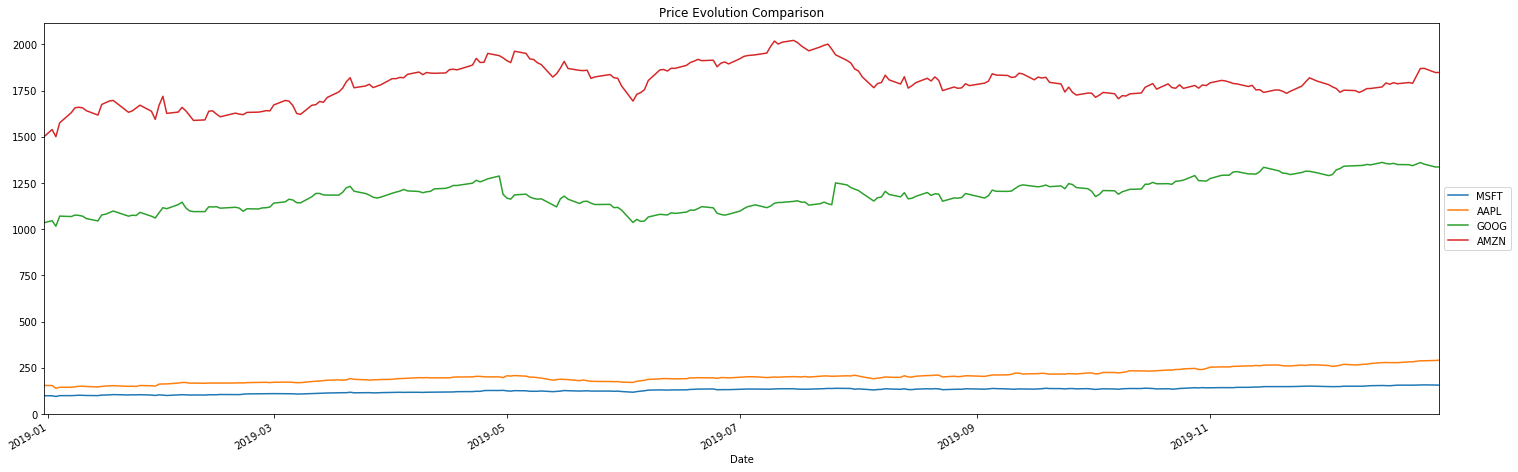

In [60]:
#plot the stock price evolution

#set size of plot
plt.figure(figsize=(25,8))

for i, col in enumerate(d.columns):
    d[col].plot()

plt.title('Price Evolution Comparison')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Stock Return 
A stock return is the change in price on a stock, which may be represented in terms of a price change or a percentage change. In order to compare the four stocks on a level playing field, we calculate the return on each of the four stocks. The daily return is defined as the percentage change in the value of a stock over a single day of trading.

In [61]:
# Create table with daily returns
ret = d.pct_change()

print(ret.head())

#create table with monthly returns


                MSFT      AAPL      GOOG      AMZN
Date                                              
2018-12-31       NaN       NaN       NaN       NaN
2019-01-02 -0.004430  0.001141  0.009888  0.024741
2019-01-03 -0.036788 -0.099607 -0.028484 -0.025242
2019-01-04  0.046509  0.042689  0.053786  0.050064
2019-01-07  0.001275 -0.002226 -0.002167  0.034353


<b> Monthly and Quarterly Return Calculation </b>

The monthly and quarterly returns can be calculated for a more high-level view of the behaviour of these four stocks' price trends.

In [63]:
# Resample `aapl` to business months, take last observation as value 
monthly = d.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
month_ret = monthly.pct_change()
print(month_ret)

                MSFT      AAPL      GOOG      AMZN
Date                                              
2018-12-31       NaN       NaN       NaN       NaN
2019-01-31  0.028158  0.055154  0.077983  0.144317
2019-02-28  0.077358  0.044777  0.003180 -0.045906
2019-03-29  0.052754  0.097026  0.047673  0.085936
2019-04-30  0.107343  0.056436  0.012929  0.081859
2019-05-31 -0.049481 -0.124213 -0.071394 -0.078613
2019-06-28  0.083118  0.130519 -0.020587  0.066792
2019-07-31  0.017244  0.076395  0.125607 -0.014179
2019-08-30  0.015037 -0.016461 -0.023490 -0.048474
2019-09-30  0.008487  0.072962  0.026008 -0.022733
2019-10-31  0.031216  0.110684  0.033724  0.023475
2019-11-29  0.059462  0.077554  0.035592  0.013587
2019-12-31  0.041749  0.098784  0.024568  0.026122


In [64]:
# Resample `aapl` to quarters, take the mean as value per quarter
quarter = d.resample("4M").mean()

# Calculate the quarterly percentage change
quat_ret = quarter.pct_change()
print(quat_ret)

                MSFT      AAPL      GOOG      AMZN
Date                                              
2018-12-31       NaN       NaN       NaN       NaN
2019-04-30  0.111647  0.129152  0.109303  0.142524
2019-08-31  0.189548  0.125347 -0.005438  0.090177
2019-12-31  0.091723  0.253746  0.115010 -0.050098


### Returns Analysis
For the purpose of this Project, we will focus on the stocks' daily returns. For a quick and easy way to obtain interesting insights from the data, we can begin by visualizing the data in different graphs.

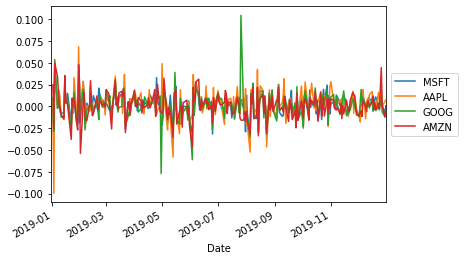

In [65]:
# Line plot of the returns
ret.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

The line plot above does not reveal much with regards to variation in trends across the four stocks' prices over the observed one-year time frame. Instead, the return distributions below enable us to quickly determine the differences in the stocks' behaviours over the one-year period.

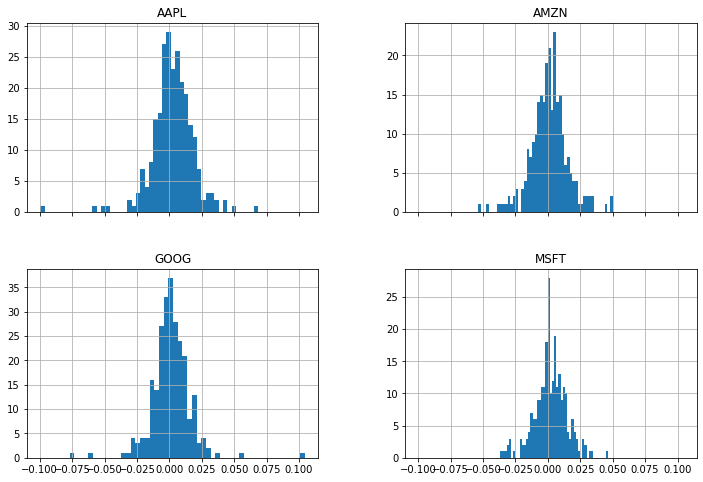

In [66]:
# Plot the distributions
ret.hist(bins=50, sharex=True, figsize=(12,8))
# Show the resulting plot
plt.show()

The volatility of a stock is a measurement of the change in variance in the stock returns over a specific period of time. It is common to compare the volatility of one stock with the volatility of another; this is done in order to get a feel for which stocks have less risk. Comparing the volatility of a stock to the volatility of the market index is also common practice in order to understand the stock’s volatility relative to the overall market. Generally, the higher the stock's volatility, the riskier the investment in that stock, which is insightful for making investment decisions.

All four distributions look symmetrical and normally distributed; the daily returns center around the bin 0.000. The returns of the above four stocks largely remain between -0.050 and 0.050. However, the daily returns for Google show a slight skewness to the right, with its bars extending further to the right when compared to the other three stocks. Based on these distribution plots, we can gather that, most of the time, Google has performed better than Apple, Amazon, and Microsoft.

Another plot that is interesting to take a look at is the relationship between the stocks' returns. This analysis is useful when examining stocks in the same industry, such as our four stocks from the technology industry. The returns of one stock may be dependent on another stock. The scatter 
plots below show the relationship between any two of our four stocks.


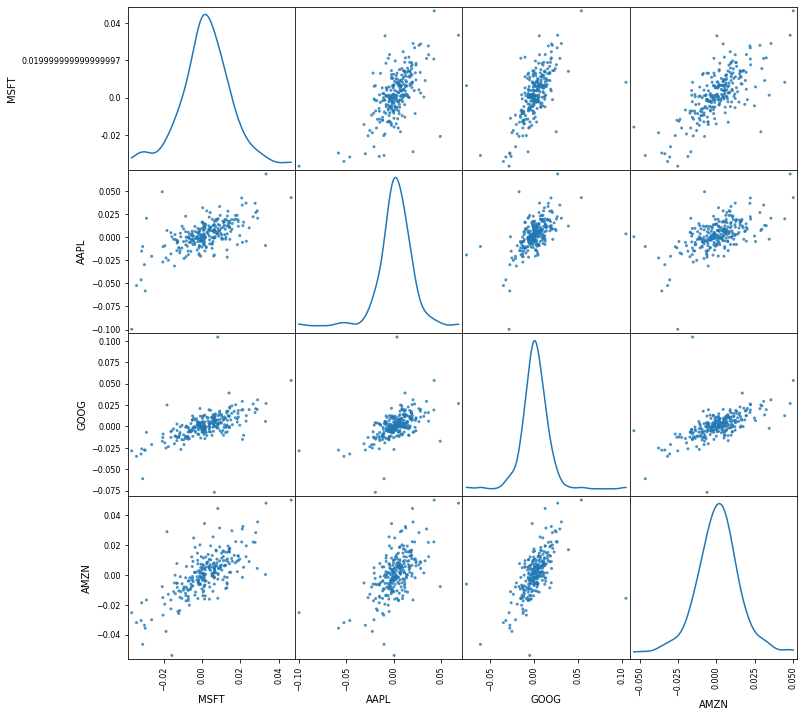

In [67]:
# Import matplotlib
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

# Plot a scatter matrix with the `daily_pct_change` data 
scatter_matrix(ret, diagonal='kde', alpha=0.8,figsize=(12,12))

# Show the plot
plt.show()

A scatter plot is a visual representation of the correlation between two items. It is related to the correlation coefficient, as it is used to indicate whether or not a linear relationship exists between two variables. The scatter plots above illustrate that there is a positive relationship between each pair of stock returns. We can further create a correlation matrix, as below, to check if any pair of our four stocks are correlated.

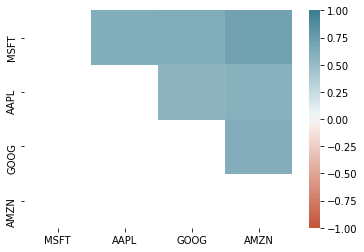

In [68]:
mask = np.tril(ret.corr())
sns.heatmap(ret.corr(), vmin=-1,cmap=sns.diverging_palette(20, 220, n=200), vmax=1, center= 0,mask=mask)
plt.show()

Based on the correlation matrix, each possible pair of stocks show a positive correlation in stock returns, with the stock returns of Amazon and Microsoft having the highest correlation.

## Calculating Stock Statistics

When making a decision on what stock to invest in, there are five important statistics that are considered. These statistics are also known as the five moments of a stock's returns.

* Mean
* Standard deviation
* Skewness
* Kurtosis
* Autocorrelation

### Mean and Standard Deviation
<b>Standard deviation</b> tells us how much the stock's return can deviate from its <b> mean</b>, or average, historical return. When stocks have a standard deviation that is greater than its mean, this suggests that the stock exhibits higher risk; however, this could be in the investor’s favor, as there is a possibility of above average returns.

In [69]:
#calculate mean
ret_mean=ret.mean()

#variance
ret_var=ret.var()

# calculate standard deviation
ret_std = ret.std()
ret_std2 = pd.DataFrame(ret.std())

#create dataframe of mean
out1 = pd.DataFrame(ret_mean)
out2 = out1.rename(columns={0: 'mean'})

#Add std as new column 
out3 = out2.join(ret_std2)
out4 = out3.rename(columns={0: 'std'})

print(out4.head())

          mean       std
MSFT  0.001883  0.012491
AAPL  0.002665  0.016466
GOOG  0.001129  0.015208
AMZN  0.000926  0.014432


### Skewness and Kurtosis

<b>Skewness</b> is used as a risk measurement tool when the stock data exhibit an asymmetrical distribution. Skewness can either be negative or positive. A stock with negative skewness is one that generates frequent small gains but few extreme losses in the time period considered. On the other hand, a stock with positive skewness is one that generates frequent small losses and few extreme gains. 

<b>Kurtosis</b> serves to measure risk, as in some instances, abnormal returns can exceed three times the standard deviation limit, according to the theory of normal distribution. Ignoring such extreme observations can create risks that are not captured by financial models that are based on normal distribution. When data follow a normal distribution, kurtosis has a value of three. A kurtosis value that is greater than three means the stock exhibits higher instances of abnormal returns, as opposed to a low value of kurtosis (less than three).

In [71]:
# calculate skewness
ret_skew=ret.skew()
# calculate Kurtosis
ret_kurt=ret.kurt()

#add as new column
out4['skew'] = ret_skew.values
out4['kurt'] = ret_kurt.values
print(out4.head())

          mean       std      skew       kurt
MSFT  0.001883  0.012491 -0.194007   1.143430
AAPL  0.002665  0.016466 -0.921614   7.240603
GOOG  0.001129  0.015208  0.559534  11.537096
AMZN  0.000926  0.014432 -0.058477   1.858702


The table above shows that Google and Apple have higher instances of abnormal returns. Generally, stocks with high positive skewness and low kurtosis outperform the stocks that display negative skewness and high kurtosis. 

### Autocorrelation

Autocorrelation measures the relationship between a variable's current value and its past values. An autocorrelation of +1 represents a perfect positive correlation with past values, while an autocorrelation of -1 represents a perfect negative correlation with past values. Autocorrelation is used to see how much of an impact a stock's past returns have on its future returns. This is particularly useful for investors who wish to predict a stock's future returns by, say, analyzing its past returns.

In [72]:
#create empty list to put autocorrelation values
autocorr_res = []

from scipy.stats import pearsonr
# For-loop to calculate autocorrelation 
for i in ret.columns:
    data0 = ret[i]
    data = data0.dropna()
    corr, pval = pearsonr(data[:-1], data[1:])
    autocorr_res.append(corr)
    
#Add autocorrelation as a column
out4['autocorr'] = autocorr_res
print(out4.head())

          mean       std      skew       kurt  autocorr
MSFT  0.001883  0.012491 -0.194007   1.143430 -0.125887
AAPL  0.002665  0.016466 -0.921614   7.240603 -0.092361
GOOG  0.001129  0.015208  0.559534  11.537096 -0.033810
AMZN  0.000926  0.014432 -0.058477   1.858702 -0.004840


With low negative autocorrelations of -0.12 to 0 among our four stocks, the degree of similarity between a given time series and a lagged version of itself over successive time intervals is minimal; therefore, past returns do not seem to influence future returns.

## Conclusion

The Project began with retrieving financial stock prices from Yahoo Finance upon which we performed basic data manipulation to calculate the four stocks' returns. We then walked through a basic analysis of the four stocks' returns by reviewing the five key statistics in financial analysis. Moving forward, further analysis may involve portfolio return analysis under different investment strategies. 

## References
1. Bhardwaj, S. (2018, December 10). Use these two tools to look for less risky, promising stocks. Retrieved July 16, 2020, from https://economictimes.indiatimes.com/wealth/invest/use-these-two-tools-to-look-for-less-risky-promising-stocks/articleshow/66997140.cms
2. Unknown. (2019). Scipy.stats.pearsonr¶. Retrieved July 16, 2020, from http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html